# Case Study: How Does a Bike-Share Navigate Speedy Success?

# Ask

### The problem we are trying to solve:
How do annual members and casual members use Cyclistic bikes differently.

### Objective:
Design a marketing campaign to convert casual riders into annual members.


### Stakeholders:
- Executive team: In charge of the final decision, they will decide if the recommended marketing strategy is approved.
- Lily Moreno: Director of marketing, responsible for the development of the marketing campaign and the bike-share initiatives. She is responsible for the success or failure of the marketing campaign based on your data analysis.

# Prepare
### Data source:
Primary data source is downloaded from [here](https://divvy-tripdata.s3.amazonaws.com/index.html). It is licensed under Motivate International Inc. This dataset consists of quantitative measurements collected from bike trackers, this doesnot include personal data from users.

### Data credibility (ROCC):
- Reliable: missing values are less than 0.1%.
- Original: Primary data source, the company Cyclistic gathers this data first-hand.
- Comprehensive: Contains more than 5 million complete data entries.
- Current: Includes data from the past 12 months.

# Process
### Tools :
Due to large amount of data we chose R language to process data.

### Cleaning and processing:
1. Installing the required packages and libraries:

In [1]:
install.packages("janitor")
library(tidyverse) #helps wrangle data
library(janitor) #helps clean data
library(ggplot2) #helps visualize data
library(dplyr) #Count distinct
library(scales) #For better numbering in plot


Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




2. Combining last 12 months data

In [2]:
m1<-read.csv("m1.csv")
m2<-read.csv("m2.csv")
m3<-read.csv("m3.csv")
m4<-read.csv("m4.csv")
m5<-read.csv("m5.csv")
m6<-read.csv("m6.csv")
m7<-read.csv("m7.csv")
m8<-read.csv("m8.csv")
m9<-read.csv("m9.csv")
m10<-read.csv("m10.csv")
m11<-read.csv("m11.csv")
m12<-read.csv("m12.csv")

In [3]:
all_data <- bind_rows(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12)

colnames(all_data)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [4]:
summary(all_data) #Summary of dataset

   ride_id          rideable_type       started_at          ended_at        
 Length:5803720     Length:5803720     Length:5803720     Length:5803720    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5803720     Length:5803720     Length:5803720     Length:5803720    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

3. Now removing empty rows

In [5]:
library(janitor) #helps clean data

In [6]:

all_data <- janitor::remove_empty(all_data,which = c("cols")) #removes empty columns
all_data <- janitor::remove_empty(all_data,which = c("rows")) #removes empty rows
all_data <- na.omit(all_data)

In [7]:
summary(all_data)

   ride_id          rideable_type       started_at          ended_at        
 Length:5797865     Length:5797865     Length:5797865     Length:5797865    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5797865     Length:5797865     Length:5797865     Length:5797865    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

4. Using ‘lubridate’ package to convert ‘started_at’ and ‘ended_at’ to ‘ymd_hms’ and new fields ‘start_hour’, ‘end_hour’ and ‘day_of_week’. also creating ride length column.

In [8]:
all_data$started_at <- lubridate::ymd_hms(all_data$started_at) #turns 'started_at' to ymd_hms
all_data$ended_at <- lubridate::ymd_hms(all_data$ended_at) #turns 'ended_at' to ymd_hms
all_data$start_hour <- lubridate::hour(all_data$started_at)
all_data$end_hour <- lubridate::hour(all_data$ended_at)
all_data$day_of_week <- wday(all_data$started_at)
all_data$ride_length <- difftime(all_data$ended_at,all_data$started_at)

5. Now check if there is any negitive ride time (end time > start time) and remove them

In [9]:
sum(all_data$ride_length <= 0, na.rm=TRUE)
all_data2 <- all_data[!(all_data$ride_length <= 0),]
sum(all_data2$ride_length <= 0, na.rm=TRUE)

[1] 539

[1] 0

6. Converting date to day of week

In [10]:
all_data2 <- all_data2 %>% 
  mutate(day_of_week = recode(day_of_week
                              ,"1" = "Sunday"
                              ,"2" = "Monday"
                              ,"3" = "Tuesday"
                              ,"4" = "Wednesday"
                              ,"5" = "Thursday"
                              ,"6" = "Friday"
                              ,"7" = "Saturday"))

# Descriptive Analysis

### 1. Summary of ride length

In [11]:
my_summary <- all_data2 %>%
  group_by(member_casual) %>%
  summarize(
    count = n(), # Count of each group
    mean = mean(ride_length), # Mean value for each group
    median = median(ride_length), # Median value for each group
    min = min(ride_length), # Minimum value for each group
    max = max(ride_length) # Maximum value for each group
  )
my_summary

member_casual,count,mean,median,min,max
<chr>,<int>,<drtn>,<drtn>,<drtn>,<drtn>
casual,2332009,1283.6529 secs,758 secs,1 secs,1922127 secs
member,3465317,732.0463 secs,520 secs,1 secs,89996 secs


### 2. Summary by week days

In [12]:
# Arranging days according to week
all_data2$day_of_week <- factor(all_data2$day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday","Sunday"))
day_summary <- all_data2 %>%
   group_by(member_casual,day_of_week) %>%
  summarize(
    count = n(), # Count of each group
    mean = mean(ride_length), # Mean value for each group
    median = median(ride_length), # Median value for each group
    min = min(ride_length), # Minimum value for each group
    max = max(ride_length) # Maximum value for each group
  )%>%
  arrange(day_of_week)
day_summary

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,count,mean,median,min,max
<chr>,<fct>,<int>,<drtn>,<drtn>,<drtn>,<drtn>
casual,Monday,275066,1305.8419 secs,738 secs,1 secs,1922127 secs
member,Monday,484442,703.8715 secs,496 secs,1 secs,89995 secs
casual,Tuesday,270786,1148.9796 secs,671 secs,1 secs,89994 secs
member,Tuesday,544188,697.0102 secs,501 secs,1 secs,88839 secs
casual,Wednesday,276116,1092.0556 secs,660 secs,1 secs,242754 secs
member,Wednesday,546105,696.7891 secs,506 secs,1 secs,89992 secs
casual,Thursday,311113,1146.5577 secs,687 secs,1 secs,137121 secs
member,Thursday,551014,708.8952 secs,512 secs,1 secs,89995 secs
casual,Friday,340228,1213.7875 secs,732 secs,1 secs,597741 secs


# Graphical Analysis

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Saving 6.67 x 6.67 in image


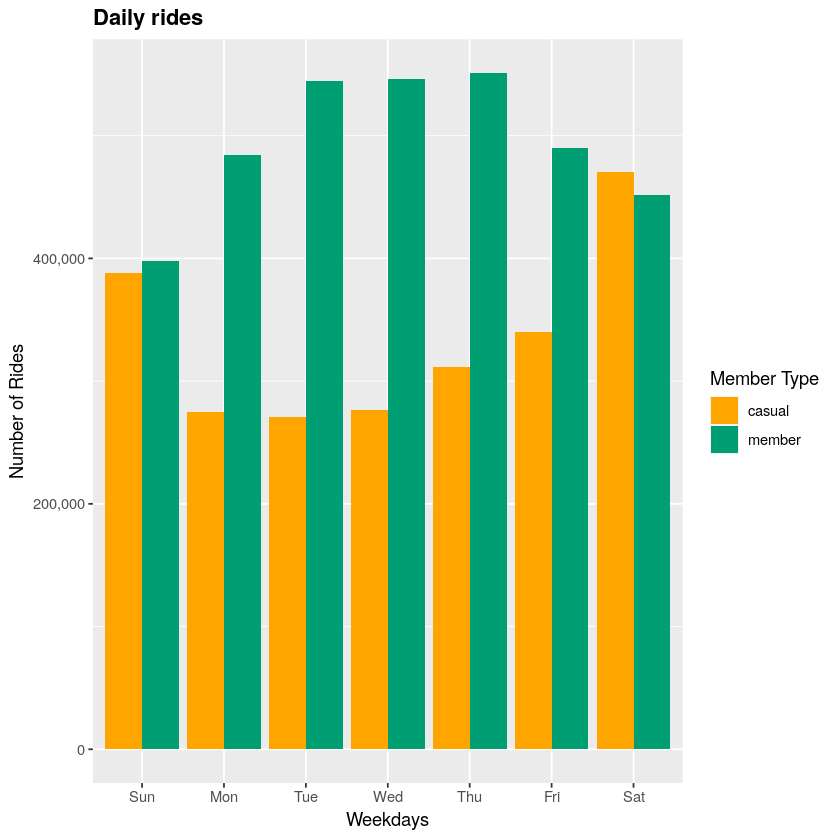

In [13]:
 all_data2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides=n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual,weekday) %>% 
  ggplot(aes(x=weekday,y=number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")+
  scale_fill_manual(values = c("#FFA500", "#009E73")) +
  scale_y_continuous(labels = comma)+
  xlab("Weekdays") +
  ylab("Number of Rides") +
  labs(fill = "Member Type")+
  ggtitle("Daily rides") +
  theme(plot.title = element_text(face = "bold")) -> wplot
  ggsave("weekdays_plot.jpg", plot = print(wplot), device = "jpeg")

### Rides by day time

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Saving 6.67 x 6.67 in image


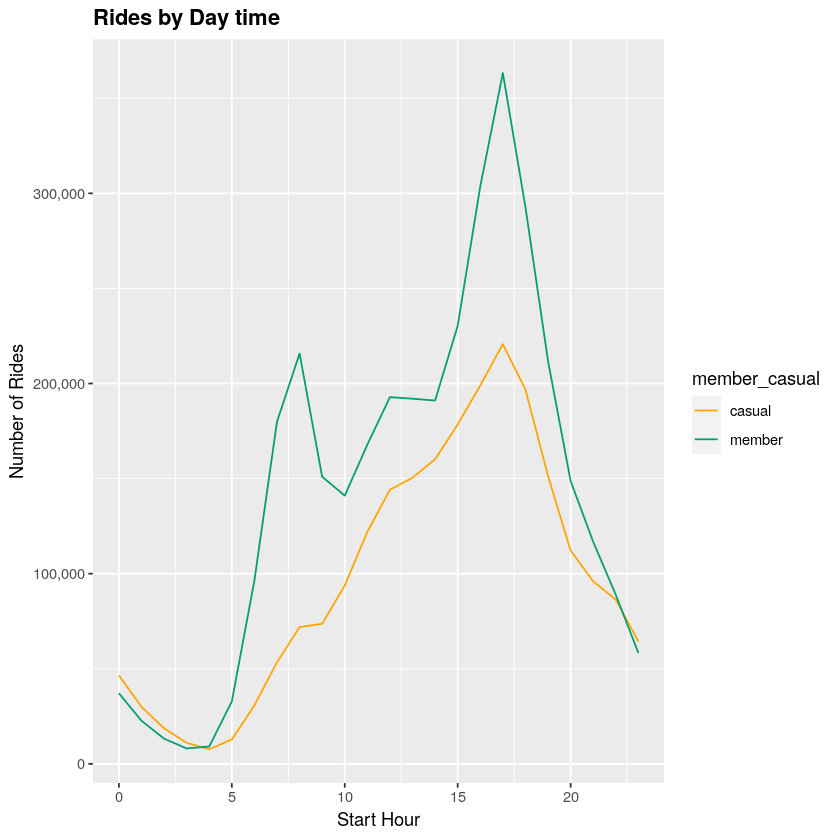

In [14]:
all_data2 %>% 
  group_by(member_casual, start_hour) %>% 
  summarise(number_of_rides=n()) %>% 
  ggplot(aes(x=start_hour,y=number_of_rides, color = member_casual)) +
  geom_line()+
  scale_color_manual(values = c("#FFA500", "#009E73")) +
  scale_y_continuous(labels = comma) +
  xlab("Start Hour") +
  ylab("Number of Rides") +
  labs(fill = "Member Type")+
  ggtitle("Rides by Day time") +
  theme(plot.title = element_text(face = "bold")) -> dayplot
  ggsave("daytime_plot.jpg", plot = print(dayplot), device = "jpeg")

  

### Average ride duration

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Saving 6.67 x 6.67 in image


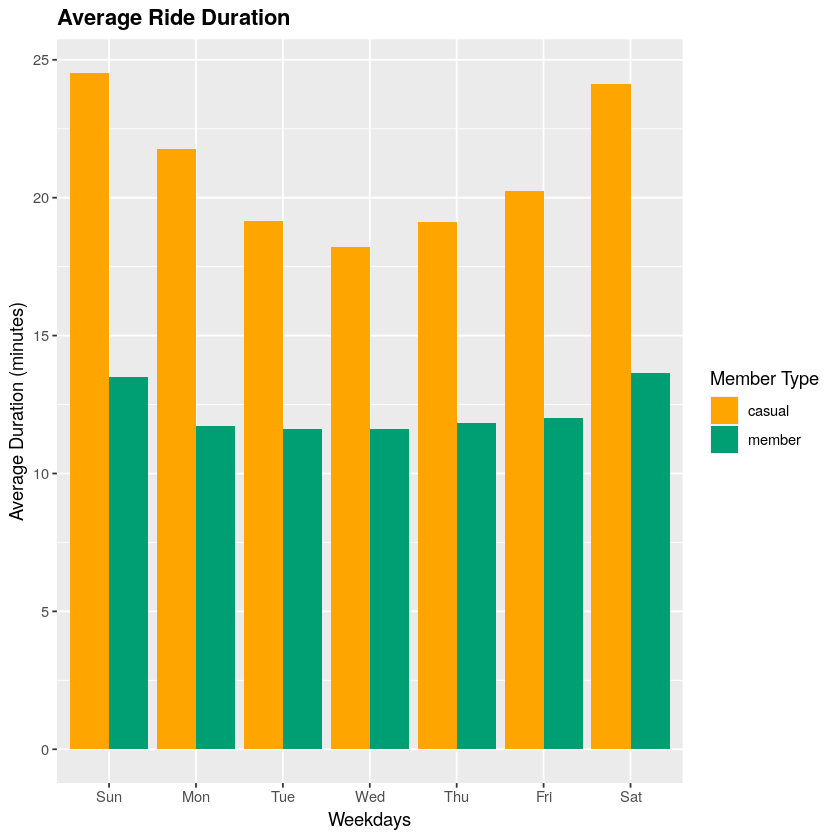

In [27]:
all_data2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides=n(), average_duration = mean(ride_length)/60) %>% 
  arrange(member_casual,weekday) %>% 
  ggplot(aes(x=weekday,y=average_duration, fill = member_casual)) +
  geom_col(position = "dodge")+scale_fill_manual(values = c("#FFA500", "#009E73")) +
  scale_y_continuous(labels = comma)+
  xlab("Weekdays") +
  ylab("Average Duration (minutes)") +
  labs(fill = "Member Type")+
  ggtitle("Average Ride Duration") +
  theme(plot.title = element_text(face = "bold")) -> aplot
  ggsave("average_plot.jpg", plot = print(aplot), device = "jpeg")

### Number of Rides by Minutes

Time difference of 1922127 secs

`summarise()` has grouped output by 'ride_length_group'. You can override using
the `.groups` argument.
Saving 6.67 x 6.67 in image


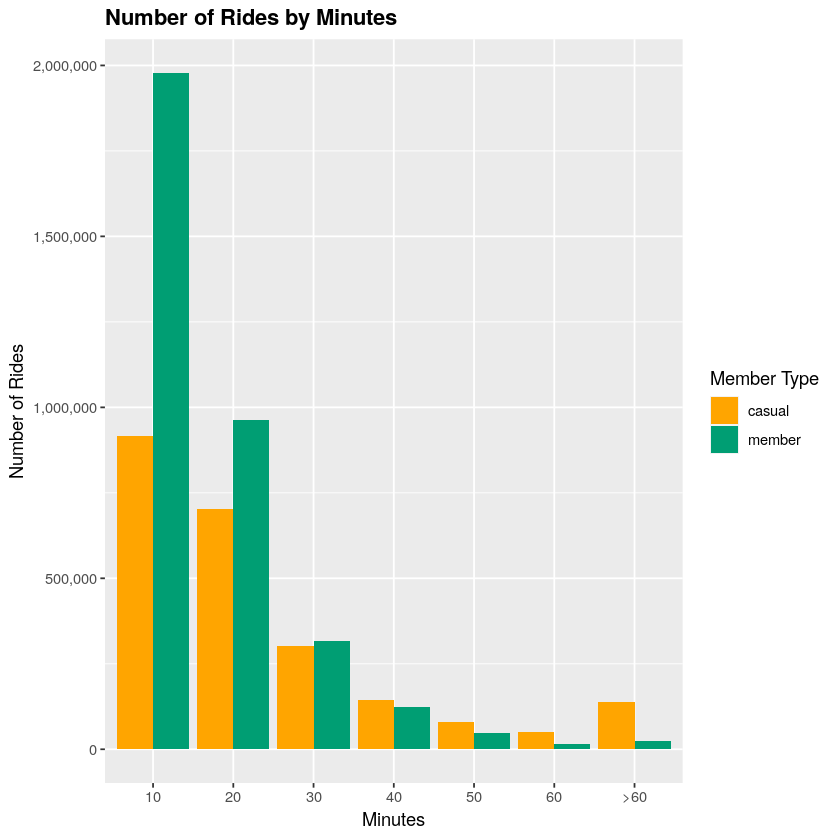

In [64]:
max (all_data2$ride_length)
all_data2 %>%
  mutate(ride_length_group = cut(as.numeric(ride_length/60), breaks = seq(0, 60, by = 10))) %>%
  mutate(ride_length_group = as.character(ride_length_group)) %>%
  replace_na(list(ride_length_group = ">60")) %>%
  mutate(ride_length_group = as.factor(ride_length_group)) %>%
  group_by(ride_length_group, member_casual) %>%
  summarise(count = n()) %>%
ggplot(aes(x=ride_length_group,y=count, fill = member_casual)) +
  geom_col(position = "dodge")+scale_fill_manual(values = c("#FFA500", "#009E73")) +
  scale_x_discrete(labels=c("10", "20", "30", "40", "50", "60", ">60")) +
  scale_y_continuous(labels = comma)+
  xlab("Minutes") +
  ylab("Number of Rides") +
  labs(fill = "Member Type")+
  ggtitle("Number of Rides by Minutes") +
  theme(plot.title = element_text(face = "bold")) -> aplot
  ggsave("duration_minutes.jpg", plot = print(aplot), device = "jpeg")

`summarise()` has grouped output by 'rideable_type', 'month_name'. You can
override using the `.groups` argument.


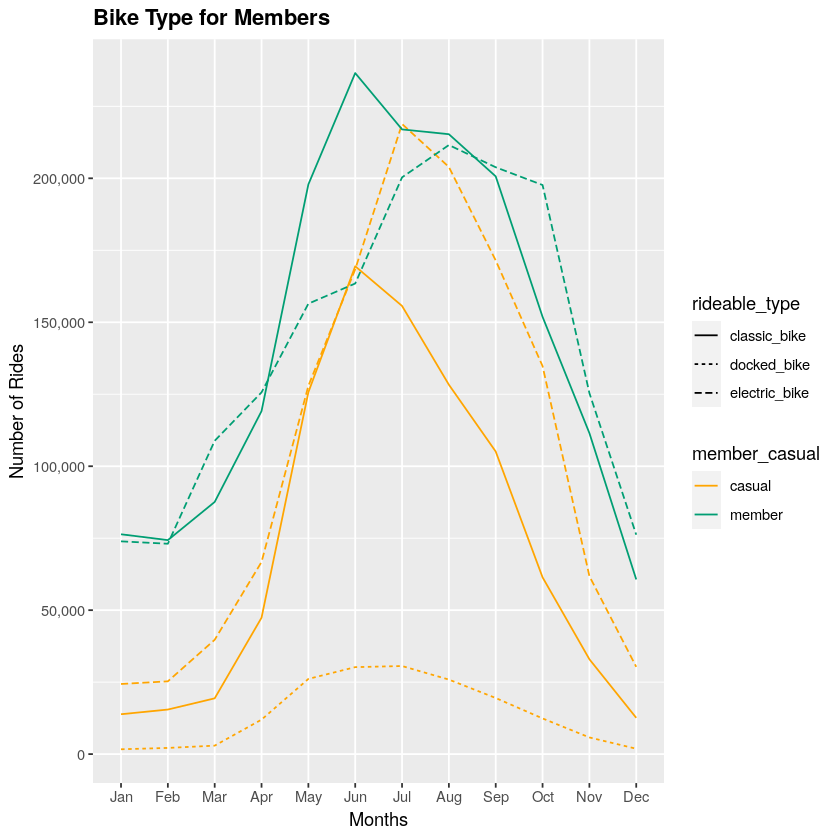

In [65]:

all_dataf <- filter(all_data2, member_casual == "casual")

all_data2 %>%
   mutate(month_name = month(started_at, label = TRUE)) %>%
   #mutate(weekday = factor(wday(started_at, label = TRUE), levels = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))) %>%
  group_by(rideable_type,month_name, member_casual) %>% 
  summarise(number_of_rides=n()) %>%
  ggplot(aes(x=month_name,y=number_of_rides,group =interaction(rideable_type, member_casual), color=member_casual, linetype= rideable_type)) +
 geom_line()+scale_color_manual(values = c("#FFA500", "#009E73")) +
  scale_y_continuous(labels = comma)+
  xlab("Months") +
  ylab("Number of Rides") +
  labs(fill = "Bike Type")+
  ggtitle("Bike Type for Members") +
  theme(plot.title = element_text(face = "bold")) 


# Analysis Results

## Insights:
- Member riders have almost double number of rides that casual members but average ride length of casual member is longer (24.5 minutes approx) than members average ride length (13.6 minutes approx.)
- Member riders mostly use bikes in weekdays and use it for short time which shows a strong possibility of using it for work.
- Casual riders use bikes for longer period of time and more bikers use it on weekends that shows strong possibility of using it for leisure.
- The number of rides in a day starts rising to peak at 3pm. The highest number of rides in a day is for 5pm then it starts to decline.
- Casual riders preffer to use electric bike while members preffer to use classic bikes.

## Recommendations:
- Provide casual riders incentives on joining like reward points for using bikes for longer minutes.
- Start some weekend deals or discounts.
- Partner with famous tourist attractions or leaisure entertaiment spots and provide incentives to members for using bike to go to those spots.